In [1]:
words = open('makemore/names.txt','r').read().splitlines() # split each line and create list of each lines

In [10]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [11]:
len(words)

32033

In [12]:
# word with minimum and maximum length
l_min = min(len(w) for w in words)
l_max = max(len(w) for w in words)
print(l_min, l_max)

2 15


In [14]:
# tuple two letters for each word for our bigram model

print(words[:1])                     # First word

for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

['emma']
e m
m m
m a


In [16]:
word = words[0]
print(word, list(word))

emma ['e', 'm', 'm', 'a']


In [22]:
b = {}                 # Dictionary to count the bigrams

for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']       # to denote start and end of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)                 # tuple - immutable
        b[bigram] = b.get(bigram, 0) +1     # count each bigrams for statistics
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [23]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [25]:
b.items() # list all key values as tuples

dict_items([(('<S>', 'e'), 1), (('e', 'm'), 1), (('m', 'm'), 1), (('m', 'a'), 1), (('a', '<E>'), 3), (('<S>', 'o'), 1), (('o', 'l'), 1), (('l', 'i'), 1), (('i', 'v'), 1), (('v', 'i'), 1), (('i', 'a'), 1), (('<S>', 'a'), 1), (('a', 'v'), 1), (('v', 'a'), 1)])

In [28]:
sorted(b.items()) # sort the items as per key

[(('<S>', 'a'), 1),
 (('<S>', 'e'), 1),
 (('<S>', 'o'), 1),
 (('a', '<E>'), 3),
 (('a', 'v'), 1),
 (('e', 'm'), 1),
 (('i', 'a'), 1),
 (('i', 'v'), 1),
 (('l', 'i'), 1),
 (('m', 'a'), 1),
 (('m', 'm'), 1),
 (('o', 'l'), 1),
 (('v', 'a'), 1),
 (('v', 'i'), 1)]

In [31]:
# To sort items with respect to values

sorted(b.items(), key = lambda kv: -kv[1]) # -kv[1] descending order

[(('a', '<E>'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1)]

In [2]:
import torch

a = torch.zeros((3,4))
a

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [33]:
a.dtype  # by default float

torch.float32

In [37]:
a = torch.zeros((3,4), dtype=torch.int32) # to convert datatype to integer
a.dtype

torch.int32

In [38]:
# To get 2-D array of bigram count, with first letter as x-axis and second letter as y-axis

N = torch.zeros((28, 28), dtype=torch.int32) # 28 ---> 26 alphabets + 1'<S>' + 1'<E>'

In [41]:
set(''.join(words)) # concatenating all the list of words and set removes duplicates

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [42]:
len(set(''.join(words)))

26

In [5]:
#converting set as sorted list

chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [46]:
# string to integer mapping dictionary
stoi = {s:i for i,s in enumerate(chars)}
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [47]:
stoi['<S>'] = 26
stoi['<E>'] = 27

In [48]:
for w in words:
    chs = ['<S>'] + list(w) +['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [49]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

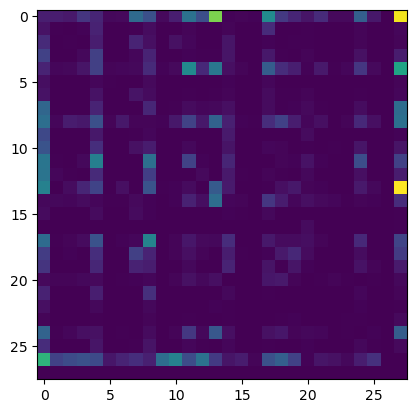

In [50]:
import matplotlib.pyplot as plt
plt.imshow(N)

In [52]:
# reverse the stoi dictionary
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

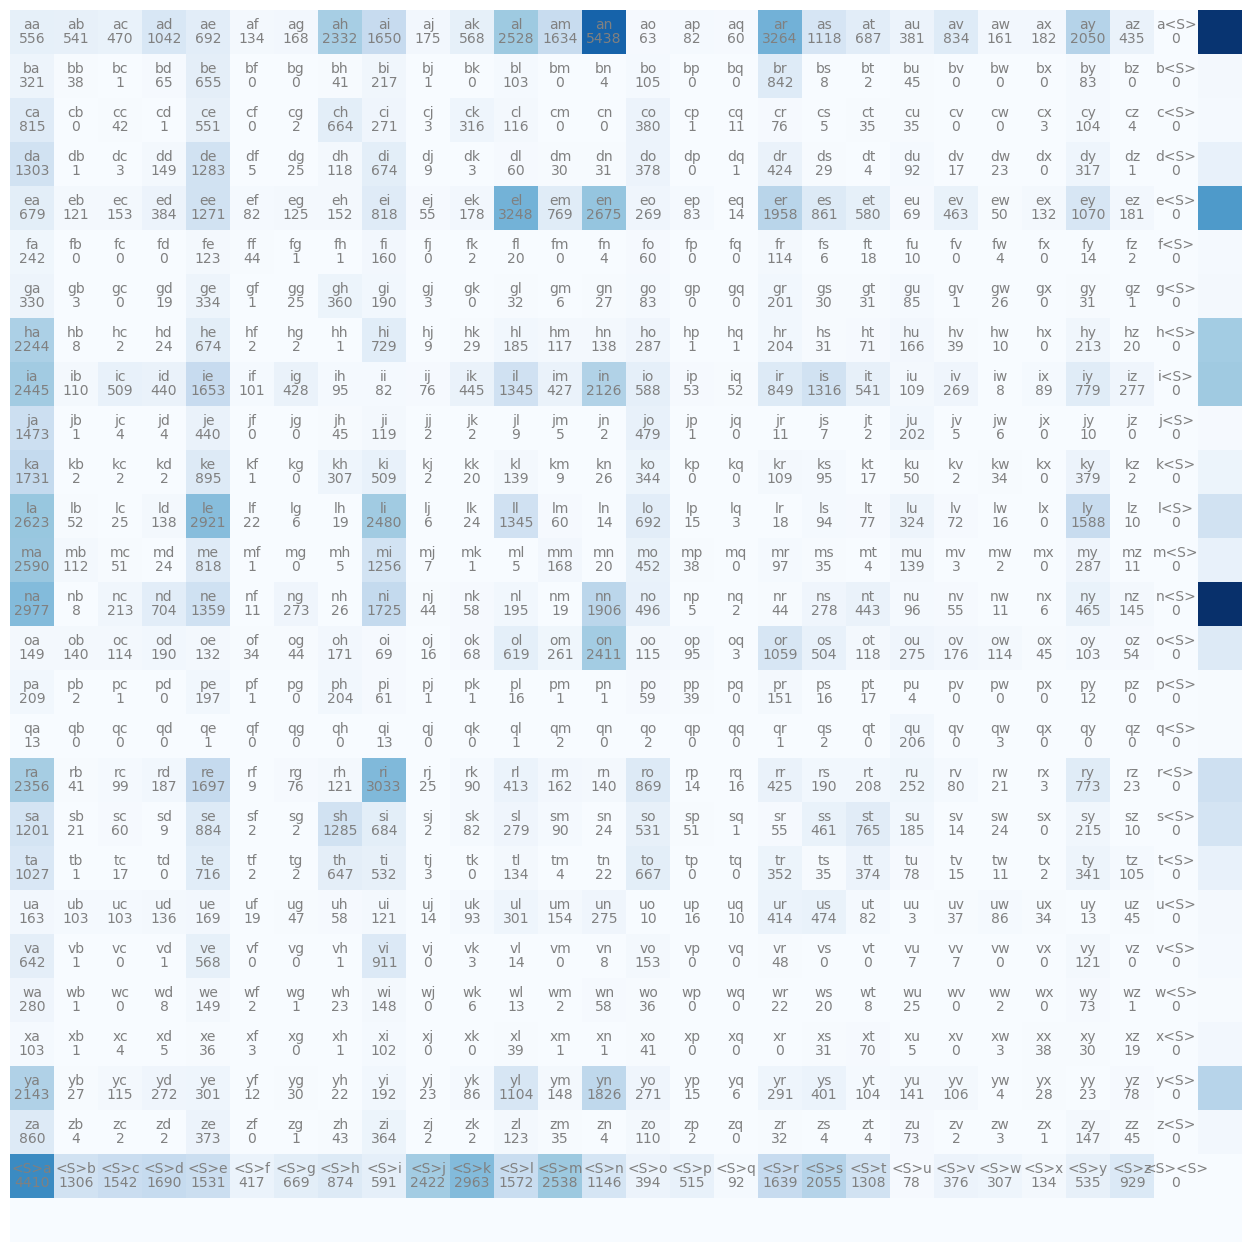

In [53]:
# to get a nice plot

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [6]:
# For good visualization and memory, we are updating the above steps- instead of '<S>', '<E>', we use '.'

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [60]:
N = torch.zeros((27, 27), dtype=torch.int32) # 28 ---> 26 alphabets + 1'.' 

for w in words:
    chs = ['.'] + list(w) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [7]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

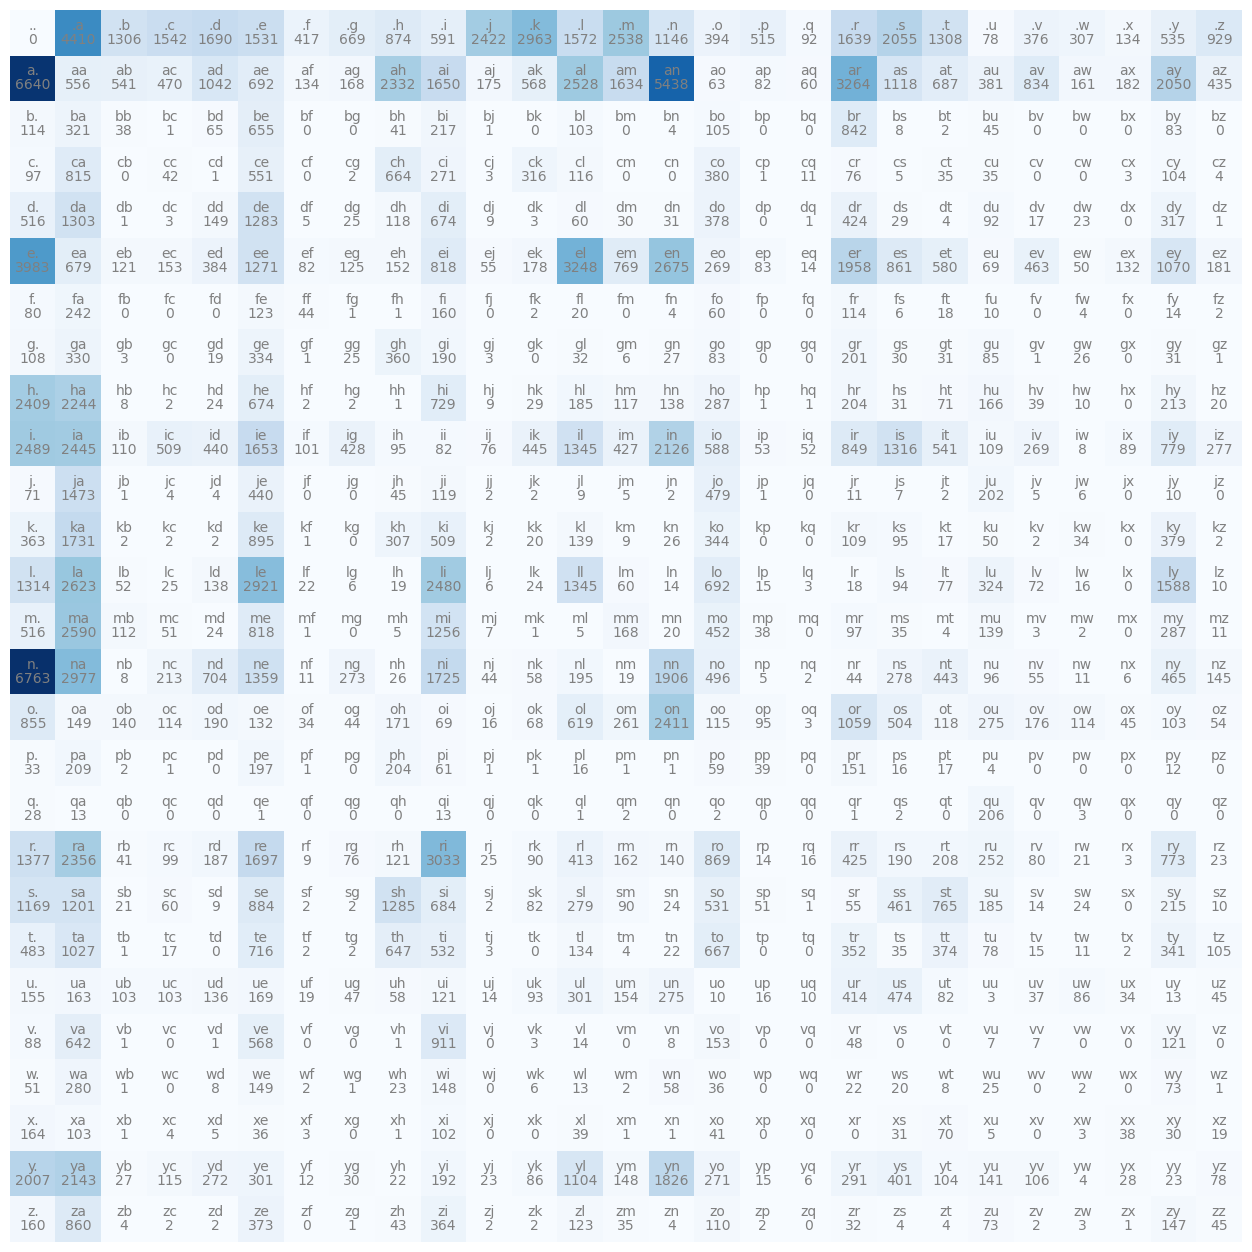

In [62]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [63]:
N[0] # First row - start of a letter


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [69]:
# Get the probability of starting letter 

p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [70]:
p.sum()

tensor(1.)

In [73]:

g = torch.Generator().manual_seed(2147483647)         # For reproducibility with randomnes

# Now get a starting letter based on the probability using torch multinomial

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix,itos[ix]


(10, 'j')

In [96]:
# To sample a word based on probability

g = torch.Generator().manual_seed(2147483647)         # For reproducibility with randomnes

out = []
ix = 0
while True:
    p = N[ix].float()                                 # Changes the row according to the letter, initially first row
    p = p / p.sum()                                   # Probability
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(itos[ix])
    out.append(itos[ix])
    if ix == 0:
        break
print(out)
print(''.join(out))
# junide is the word we get


j
u
n
i
d
e
.
['j', 'u', 'n', 'i', 'd', 'e', '.']
junide.


In [128]:
# for more words - say 10

g = torch.Generator().manual_seed(2147483647)         # For reproducibility with randomnes



for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()                                 # Changes the row according to the letter, initially first row
        p = p / p.sum()                                   # Probability

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        #print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break
    #print(out)
    print(''.join(out))

# But not every name is good

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [92]:
# For efficiency, we are gonna construct the probability by row before, instead of doing inside the loop

P = N.float()
P.shape

torch.Size([27, 27])

In [93]:
P.sum(0, keepdims=True).shape # index 0, count by columns

torch.Size([1, 27])

In [94]:
P.sum(0, keepdims=True)

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [88]:
P.sum(1, keepdims=True).shape # index 1, count with respect to rows

torch.Size([27, 1])

In [95]:
P.sum(1, keepdims=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [111]:

g

In [141]:
# To get probability matrix with respect to rows
P = (N+1).float()                      # add 1 as a fake count, so that none of the combinations of bigrams, gives -- 
                                       # -- 0 count which lead to the value of infinity(log likelihood)
# Broadcasting semantics
P = P / P.sum(1, keepdim=True)         # Look into broadcasting semantics


g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p=P[ix]
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        #print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break
    #print(out)
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [138]:
# Now we wanted to check the quality of our words with maximum log likelihood estimation
# likelihood is the product of all probabilities

# First find the probability of the bigram
ll=0.0 # Initiating log likelihood
n=0

for w in words[:3]:
    chs = ['.'] + list(w) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        print(f'{ch1}{ch2} : {prob:.4f}')

        # For a good estimation of words, the probability of our selected bigram in our model should be closer to 1
        # if probability is closer to 1 then its log should be closer to 0 ---> log 1 = 0
        # log of values closer to 0, gives - inf  -----> log 0 = -inf
        # to get a single value for the quality check estimation, we do product of probability of all values
        # which is equal to the sum of logs (log of likelihood), log(p1*p2*p3) = log p1 + log p2 + log p3
        # since every value of probability is between 0 and 1, we get log to be a negative value
        # Instead of maximizing the negative values, we are going to minimize -log
        
        ll += torch.log(prob)
        n+=1

avgll = ll/n # average of log likelihood
nll = -avgll 
print(f'{ll=}, {avgll=}, {nll=}')

# we need to minimise the average negative log likelihood - nll

.e : 0.0478
em : 0.0377
mm : 0.0253
ma : 0.3899
a. : 0.1960
.o : 0.0123
ol : 0.0780
li : 0.1777
iv : 0.0152
vi : 0.3541
ia : 0.1381
a. : 0.1960
.a : 0.1377
av : 0.0246
va : 0.2495
a. : 0.1960
ll=tensor(-38.7856), avgll=tensor(-2.4241), nll=tensor(2.4241)


In [140]:
# Testing a word quality with this estimate

ll=0.0 # Initiating log likelihood
n=0

for w in ['lochini']:
    chs = ['.'] + list(w) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        print(f'{ch1}{ch2} : {prob:.4f}')

        # For a good estimation of words, the probability of our model should be closer to 1
        # if probability is closer to its log should be closer to 0
        # log of values closer to 0, gives - inf
        # to get 1 value for the quality check estimation, we do product of probability of all values
        # which is equal to the sum of logs (log of likelihood), log(p1*p2*p3) = log p1 + log p2 + log p3
        # since every value of probability is between 0 and 1, we get sum of log to be a negative
        # Instead of maximizing the negative values, we are going to minimize -log
        
        ll += torch.log(prob)
        n+=1

avgll = ll/n # average of log likelihood
nll = -avgll 
print(f'{ll=}, {avgll=}, {nll=}')

.l : 0.0491
lo : 0.0496
oc : 0.0144
ch : 0.1880
hi : 0.0957
in : 0.1201
ni : 0.0941
i. : 0.1406
ll=tensor(-20.7233), avgll=tensor(-2.5904), nll=tensor(2.5904)


In [12]:
## To model our bigrams using neural network, we need input and output features for training

xs = []     # input
ys = []     # output

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [13]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [15]:
# instead of sending one character value to the neuron, we will get one hot encoding for all 27 alphabets

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()   # one hot encoding

In [16]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
xenc.shape

torch.Size([5, 27])

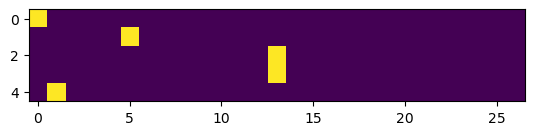

In [18]:
import matplotlib.pyplot as plt

plt.imshow(xenc)

In [21]:
# Assigning weights randomly

W = torch.randn((27,1))       # random number from mean 0 and std dev 1
W

tensor([[ 0.2730],
        [ 1.8576],
        [-0.3945],
        [-1.3862],
        [-0.0128],
        [ 0.2615],
        [-1.4980],
        [-0.3486],
        [ 0.5099],
        [ 1.2160],
        [ 0.5423],
        [-0.2950],
        [-0.6090],
        [ 1.3357],
        [ 1.2044],
        [ 0.1381],
        [ 0.6316],
        [-0.3103],
        [-2.3385],
        [ 0.7151],
        [-0.0487],
        [-1.2550],
        [-0.0168],
        [ 1.0985],
        [ 0.7301],
        [ 1.2708],
        [ 0.4973]])

In [22]:
# For 1 neuron
# Matrix multiplication @ 

xenc @ W   # 5x27 @ 27x1 --> 5x1


tensor([[0.2730],
        [0.2615],
        [1.3357],
        [1.3357],
        [1.8576]])

In [28]:
# For 27 neurons

W = torch.randn((27,27))

xenc @ W

tensor([[-1.2699,  0.4576, -1.0939, -0.8050, -0.8069,  1.5739,  0.9379, -0.0860,
         -0.1493,  0.5852, -1.2104, -0.9558, -0.3145, -1.0681, -1.4323, -2.8606,
         -0.0341, -0.0073,  2.5566,  0.6577, -0.9103,  1.9978, -0.1379,  0.9388,
          0.2289, -0.1748,  1.3453],
        [ 0.9528, -1.8636,  0.5733,  0.9711, -0.9402, -0.4944,  1.2752,  0.4128,
          0.5034,  2.0715,  0.2961, -1.1286,  2.0302, -1.1370, -0.6321, -0.0229,
         -0.1425, -1.0119,  0.5759,  0.3444,  1.5520, -1.7025, -0.8616, -0.3667,
         -1.8835,  1.7741,  0.0857],
        [-0.4079, -0.3024, -1.5419,  1.4936, -0.9184, -1.3252,  0.7638, -1.2090,
         -0.4305, -0.7670,  1.4144, -0.1825, -0.4424,  0.0789, -0.8068,  0.6804,
          1.6165,  0.7185, -0.2471, -0.1518, -1.6098,  0.1058, -0.8128,  0.1474,
          0.5391,  1.0659, -0.2803],
        [-0.4079, -0.3024, -1.5419,  1.4936, -0.9184, -1.3252,  0.7638, -1.2090,
         -0.4305, -0.7670,  1.4144, -0.1825, -0.4424,  0.0789, -0.8068,  0.6804

In [29]:
(xenc @ W).shape

torch.Size([5, 27])

In [30]:
(xenc @ W)[3,13] # fourth input in xenc and 14th neuron output

tensor(0.0789)

In [31]:
# which is also the same for dot product of 4 th input of xenc and weights of 14th neuron 

xenc[3] * W[:,13]      # Element wise multiplication or dot product

tensor([-0.0000, 0.0000, -0.0000, -0.0000, -0.0000, -0.0000, 0.0000, -0.0000, 0.0000,
        0.0000, -0.0000, 0.0000, 0.0000, 0.0789, 0.0000, 0.0000, 0.0000, 0.0000,
        -0.0000, 0.0000, 0.0000, -0.0000, -0.0000, 0.0000, -0.0000, 0.0000, -0.0000])

In [32]:
(xenc[3] * W[:,13]).sum()

tensor(0.0789)

In [33]:
# Simple neural network without bias and non linearity function

logits = xenc @ W # somewhat like log counts
counts = logits.exp() # somewhat equivalent to N matrix - since the values in logits are both positive and negatives
                      # Taking exponential will always be positive, negative values will be less than 1
probs = counts / counts.sum(1, keepdims=True)  # softmax 
probs

tensor([[0.0056, 0.0316, 0.0067, 0.0089, 0.0089, 0.0965, 0.0511, 0.0183, 0.0172,
         0.0359, 0.0060, 0.0077, 0.0146, 0.0069, 0.0048, 0.0011, 0.0193, 0.0198,
         0.2577, 0.0386, 0.0080, 0.1474, 0.0174, 0.0511, 0.0251, 0.0168, 0.0768],
        [0.0503, 0.0030, 0.0344, 0.0512, 0.0076, 0.0118, 0.0695, 0.0293, 0.0321,
         0.1540, 0.0261, 0.0063, 0.1478, 0.0062, 0.0103, 0.0190, 0.0168, 0.0071,
         0.0345, 0.0274, 0.0916, 0.0035, 0.0082, 0.0134, 0.0030, 0.1144, 0.0211],
        [0.0183, 0.0203, 0.0059, 0.1223, 0.0110, 0.0073, 0.0590, 0.0082, 0.0179,
         0.0128, 0.1130, 0.0229, 0.0176, 0.0297, 0.0123, 0.0542, 0.1383, 0.0564,
         0.0215, 0.0236, 0.0055, 0.0305, 0.0122, 0.0318, 0.0471, 0.0798, 0.0208],
        [0.0183, 0.0203, 0.0059, 0.1223, 0.0110, 0.0073, 0.0590, 0.0082, 0.0179,
         0.0128, 0.1130, 0.0229, 0.0176, 0.0297, 0.0123, 0.0542, 0.1383, 0.0564,
         0.0215, 0.0236, 0.0055, 0.0305, 0.0122, 0.0318, 0.0471, 0.0798, 0.0208],
        [0.0426, 0.0520,

In [34]:
probs.shape

torch.Size([5, 27])

In [35]:
probs[0].sum()

# softmax always converts any series consisting of +ves and -ves to a probability

# softmax (z) = e^z / sum(e^z)

tensor(1.)

In [36]:
nlls = torch.zeros(5)
for i in range(5): 
  # i-th bigram:
  x = xs[i].item() # input character index # input feature [1,27] - one hot encoded
  y = ys[i].item() # label character index # output single character from 27 values to train
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0056, 0.0316, 0.0067, 0.0089, 0.0089, 0.0965, 0.0511, 0.0183, 0.0172,
        0.0359, 0.0060, 0.0077, 0.0146, 0.0069, 0.0048, 0.0011, 0.0193, 0.0198,
        0.2577, 0.0386, 0.0080, 0.1474, 0.0174, 0.0511, 0.0251, 0.0168, 0.0768])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.09648033231496811
log likelihood: -2.33841609954834
negative log likelihood: 2.33841609954834
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0503, 0.0030, 0.0344, 0.0512, 0.0076, 0.0118, 0.0695, 0.0293, 0.0321,
        0.1540, 0.0261, 0.0063, 0.1478, 0.0062, 0.0103, 0.0190, 0.0168, 0.0071,
        0.0345, 0.0274, 0.0916, 0.0035, 0.0082, 0.0134, 0.0030, 0.1144, 0.0211])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.00

In [ ]:
# We have to adjust the weights to minimise the loss function - gradient optimisation


############################# Optimization #######################################

In [37]:
xs              # input not vectorized with one-hot encoding

tensor([ 0,  5, 13, 13,  1])

In [38]:
ys              # output labels

tensor([ 5, 13, 13,  1,  0])

In [64]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # gradient as true for backward propagation

In [41]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character


In [42]:
probs.shape      # output consisting of 5 rows for the input of 5 character vectors [., e, m, m, a]

torch.Size([5, 27])

In [43]:
# predicted neuron probability of these 5 characters
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [48]:
# the above can also be written as

probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [49]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [52]:
# Single loss value to minimize by gradient optimisation

loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [53]:
loss.item()

3.7693049907684326

In [65]:
# updated forward pass with loss

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()


3.7693049907684326

In [66]:
# Backward propagation
W.grad = None     # similar to initializing to zero gradient
loss.backward()

In [67]:
# Update the weights with respect to gradient

W.data = -0.1 * W.grad # to decrease loss value # learning rate 0.1

In [68]:
# Checking for loss after updation

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.2768313884735107

In [69]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [73]:
xs[:15]

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22])

In [75]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # regularization of loss
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.696505308151245
2.6773717403411865
2.6608052253723145
2.6463513374328613
2.633665084838867
2.622471332550049
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711238384246826
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539445877075195
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538721799850464
2.536262035369873
2.5339581966400146
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773265838623
2.521263837814331
2.519836664199829
2.5184857845306396
2.517204999923706
2.515990734100342
2.5148372650146484
2.5137410163879395
2.51269793510437
2.511704921722412
2.5107579231262207
2.509855031967163
2.5089924335479736
2.5081682205200195
2.507380247116089
2.5066258907318115
2.5059032440185547
2.5052106380462646
2.5045459270477295
2.503908157348633
2.503295660018921
2.502706289291382
2.5021398067474365
2.501594305038452
2.501069307327270

In [76]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):      # no. of words to predict
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [ ]:
# The outputs of simple neural net are similar to counting algorithm and statistics